<a href="https://colab.research.google.com/github/Abhiram-K-User/Basics-of-Machine-Learning/blob/main/Trial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [42]:
class Model(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.inp=nn.Linear(4,10)
    self.hide=nn.Linear(10,9)
    self.out=nn.Linear(9,3)
  def forward(self,x):
    x=F.relu(self.inp(x))
    x=F.relu(self.hide(x))
    x=self.out(x)
    return x

In [43]:
torch.manual_seed(69)
ob1=Model()

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)

In [46]:
my_df['species']=my_df['species'].replace('setosa',0.0)
my_df['species']=my_df['species'].replace('versicolor',1.0)
my_df['species']=my_df['species'].replace('virginica',2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [47]:
X=my_df.drop('species',axis=1).values
y=my_df['species'].values

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

In [50]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [53]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(ob1.parameters(),lr=0.01)

In [54]:
epochs=200
losses=[]
for i in range(epochs):
  y_pred=ob1.forward(X_train) #Obtains predicted results
  Loss=criterion(y_pred,y_train) #Measuring of predicted y value versus the y_train
  losses.append(Loss.detach().numpy())

  if i%20==0:
    print(f"Epoch: {i} Loss: {Loss}")

  optimizer.zero_grad()
  Loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.187013030052185
Epoch: 20 Loss: 0.6615630984306335
Epoch: 40 Loss: 0.298295259475708
Epoch: 60 Loss: 0.11400678753852844
Epoch: 80 Loss: 0.06102548912167549
Epoch: 100 Loss: 0.049291715025901794
Epoch: 120 Loss: 0.044080983847379684
Epoch: 140 Loss: 0.040326595306396484
Epoch: 160 Loss: 0.0371963195502758
Epoch: 180 Loss: 0.0345459021627903


Text(0.5, 0, 'epoch')

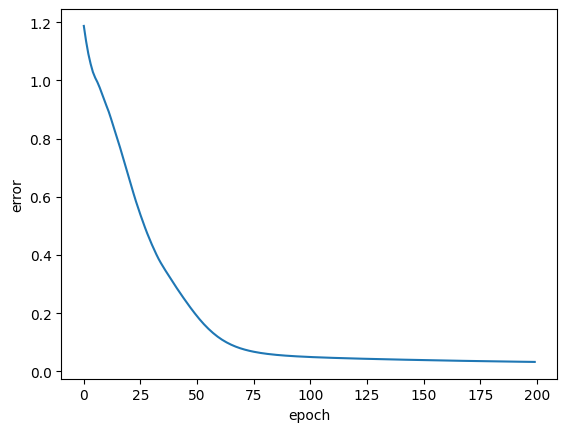

In [55]:
plt.plot(range(epochs),losses)
plt.ylabel("error")
plt.xlabel("epoch")